In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Input, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
model = Sequential([
	Input(shape=(32, 32 ,3)),
	Conv2D(32, kernel_size=(3, 3), activation='relu'),
	MaxPooling2D(),
	Conv2D(64, kernel_size=(3, 3), activation='relu'),
	MaxPooling2D(),
	Conv2D(128, kernel_size=(3, 3), activation='relu'),
	MaxPooling2D(),
	Flatten(),
	Dense(64, activation='relu'),
	Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.3429 - loss: 1.7727 - val_accuracy: 0.5580 - val_loss: 1.2323
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.5783 - loss: 1.1925 - val_accuracy: 0.6199 - val_loss: 1.0963
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6416 - loss: 1.0235 - val_accuracy: 0.6528 - val_loss: 0.9991
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6818 - loss: 0.9159 - val_accuracy: 0.6855 - val_loss: 0.9183
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7102 - loss: 0.8321 - val_accuracy: 0.6712 - val_loss: 0.9547
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7371 - loss: 0.7596 - val_accuracy: 0.6890 - val_loss: 0.8993
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.7493 - loss: 0.7111 - val_accuracy: 0.7037 - val_loss: 0.8739
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.7712 -

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7122 - loss: 0.8861


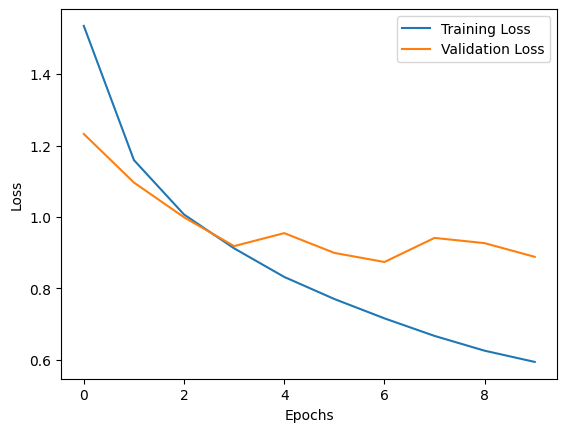

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

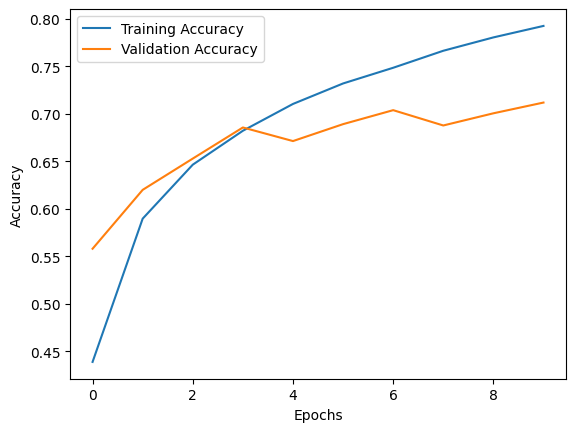

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7122 - loss: 0.8861


In [12]:
y_preds = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


Actual label: [4]
Predicted label: [9.6661881e-02 3.4227883e-03 3.1197004e-02 2.7682658e-02 8.2773763e-01
 2.7091178e-04 5.3589564e-04 6.1954989e-04 6.2957295e-04 1.1242135e-02]


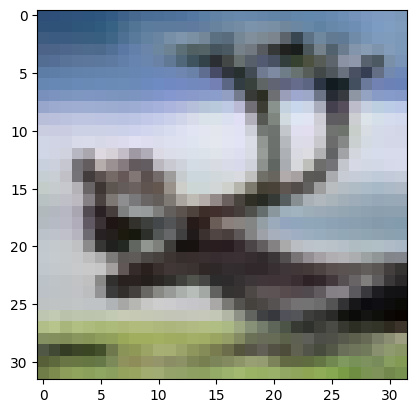

In [13]:
plt.imshow(X_test[40])
print(f'Actual label: {(y_test[40])}')
print(f'Predicted label: {(y_preds[40])}')
plt.show()